This notebook is for exploring some Pytorch data ulilities work with simple examples, includes:

- torchvision.transforms.`Resize`
- torch.utils.data.`random_split`
- torch.utils.data.`Subset`
- torch.utils.data.`dataloader`

In [1]:
import torch
import torchvision
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as tt

# Introduction

The data includes images (downloaded from [here](https://www.pngitem.com/)) that are put into three classes (Class1, Class2, Class3). In application, we can consider these are the three classes that we want to categorize the images into: Class1: class of animals, Class2: bird, and Class3: fish. Later on, we will explore how to do `Resize` all images, `random_split` all images in the train, validation sets. Then how to get the data `subset` and put the data in `dataloader`.

# Explore the data

In [2]:
data_dir = './Data/003'  # Images downloaded from https://www.pngitem.com/
classes = os.listdir(data_dir)
print("Images available in the data: ", classes) 

Images available in the data:  ['Class1', 'Class2', 'Class3']


In [3]:
for c in classes:
    print(os.listdir(('./Data/003/'+c)))

['0-dog.png', '1-cat.png', '2-mouse.png', '3_monkey.png', '4_hourse.png', '5_sheep.png']
['6_bird1.png', '7_bird2.png', '8_bird3.png']
['10_fish2.png', '11_fish3.png', '9_fish1.png']


In [4]:
dat_all = ImageFolder(data_dir, transform=ToTensor())
print('Total number of images in the data:', len(dat_all)), print("The classes available in the data", dat_all.classes)

Total number of images in the data: 12
The classes available in the data ['Class1', 'Class2', 'Class3']


(None, None)

In [5]:
def show_example(dataset, i):
    """
    dataset: a image data set gotten using ImageFolder
    i: the index of the image that we want to plot"""
    img, label = dataset[i]
    plt.imshow(img.permute(1, 2, 0) )

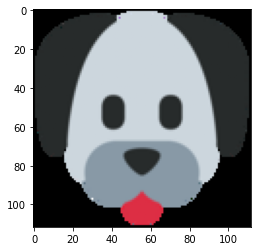

In [6]:
show_example(dat_all, 0)

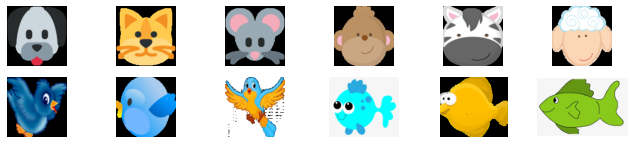

In [7]:
# Plot all of the images in the data
n_rows = 2
n_cols = 6
plt.figure(figsize=(n_cols * 1.9, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        show_example(dat_all, index)
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.2) #adjust the figure sizes to archieve the desired wspace and hspace 
plt.show()    

# Explore the size of the data, how the `torchvision.transforms.Resize` works

In [8]:
for index in range(len(dat_all)):
    print("index: ", index, ", size: ", dat_all[index][0].size())

index:  0 , size:  torch.Size([3, 112, 112])
index:  1 , size:  torch.Size([3, 112, 112])
index:  2 , size:  torch.Size([3, 112, 112])
index:  3 , size:  torch.Size([3, 112, 112])
index:  4 , size:  torch.Size([3, 112, 112])
index:  5 , size:  torch.Size([3, 112, 112])
index:  6 , size:  torch.Size([3, 112, 112])
index:  7 , size:  torch.Size([3, 112, 112])
index:  8 , size:  torch.Size([3, 112, 112])
index:  9 , size:  torch.Size([3, 95, 112])
index:  10 , size:  torch.Size([3, 99, 112])
index:  11 , size:  torch.Size([3, 72, 112])


First, we will see that when our images have different sizes, then the `tt.Resize(img_size)` can only change the width of the images. \
We see from the below example that when using `Resize((72))`, we can only change the width of the images, and the heights of the images will/will not be changed depending on the aspect ratio of the images. \
It is not good since we want images of the same size to be put in any CNN model.

In [9]:
image_tfms1 = tt.Compose([
                         tt.Resize((72)),
                         tt.ToTensor(), ])
dat_all_new1 = ImageFolder(data_dir, transform=image_tfms1)
for index in range(len(dat_all_new1)):
    print("index: ", index, ", size: ", dat_all_new1[index][0].size())

index:  0 , size:  torch.Size([3, 72, 72])
index:  1 , size:  torch.Size([3, 72, 72])
index:  2 , size:  torch.Size([3, 72, 72])
index:  3 , size:  torch.Size([3, 72, 72])
index:  4 , size:  torch.Size([3, 72, 72])
index:  5 , size:  torch.Size([3, 72, 72])
index:  6 , size:  torch.Size([3, 72, 72])
index:  7 , size:  torch.Size([3, 72, 72])
index:  8 , size:  torch.Size([3, 72, 72])
index:  9 , size:  torch.Size([3, 72, 84])
index:  10 , size:  torch.Size([3, 72, 81])
index:  11 , size:  torch.Size([3, 72, 112])


So, if we want to resize the images and have square sizes fro all of the images, we need to use `torchvision.transforms.ReSize((img_size, img_size))`:

In [10]:
image_tfms2 = tt.Compose([
                         tt.Resize((72, 72)),
                         tt.ToTensor(), ])
dat_all_new2 = ImageFolder(data_dir, transform=image_tfms2)
for index in range(len(dat_all_new2)):
    print("index: ", index, ", size: ", dat_all_new2[index][0].size())

index:  0 , size:  torch.Size([3, 72, 72])
index:  1 , size:  torch.Size([3, 72, 72])
index:  2 , size:  torch.Size([3, 72, 72])
index:  3 , size:  torch.Size([3, 72, 72])
index:  4 , size:  torch.Size([3, 72, 72])
index:  5 , size:  torch.Size([3, 72, 72])
index:  6 , size:  torch.Size([3, 72, 72])
index:  7 , size:  torch.Size([3, 72, 72])
index:  8 , size:  torch.Size([3, 72, 72])
index:  9 , size:  torch.Size([3, 72, 72])
index:  10 , size:  torch.Size([3, 72, 72])
index:  11 , size:  torch.Size([3, 72, 72])


# Explore torch.utils.data.`random_split`

With this simple example, we will create train data set (train_ds) and validation data set (val_ds). \
 We can see that the `random_split` returns the `[Subset(dataset, indices[offset - length : offset])` with indices is randomly generated from the `len(dataset)`.

In [11]:
random_seed = 42
torch.manual_seed(random_seed)
# Create train_ds with size 6, and val_ds with size 6 
train_ds, val_ds= torch.utils.data.random_split(dat_all_new2, [6,6])

Below are the lengths and indices for the train_ds and val_ds

In [12]:
print("Length of the train_ds:", len(train_ds))
print("Length of the val_ds:", len(val_ds))
print("train_ds's indices:", train_ds.indices)
print("val_ds's indices:", val_ds.indices)

Length of the train_ds: 6
Length of the val_ds: 6
train_ds's indices: [6, 8, 1, 7, 0, 2]
val_ds's indices: [10, 11, 4, 3, 5, 9]


Since train_ds is a subset with 6 elements, the below command brings an error

In [13]:
train_ds[6]

IndexError: list index out of range

Here, we can have access to the images in the train_ds

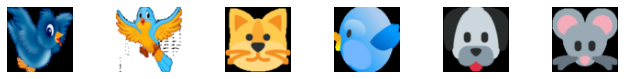

In [14]:
n_rows = 1
n_cols = 6
plt.figure(figsize=(n_cols * 1.9, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        show_example(train_ds, index)
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.2) #adjust the figure sizes to archieve the desired wspace and hspace 
plt.show()   

However, since train_ds is a subset of dat_all_new2, we still can get all of images of dat_all_news using train_ds.dataset

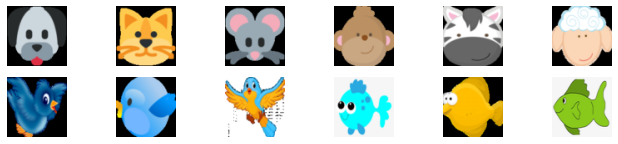

In [15]:
n_rows = 2
n_cols = 6
plt.figure(figsize=(n_cols * 1.9, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        show_example(train_ds.dataset, index)
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.2) #adjust the figure sizes to archieve the desired wspace and hspace 
plt.show()

# Explore torch.utils.data.dataloader

In [16]:
from torch.utils.data.dataloader import DataLoader
train_dl = DataLoader(train_ds, batch_size=3, shuffle=False)

In [17]:
from torchvision.utils import make_grid
def show_batch(dl): 
    """dl: a data loader
    Show image in a batch of dl, a dataloader..""" 
    for images, labels in dl:
        print(labels)
        fig, ax = plt.subplots(figsize=(10,9))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        break

tensor([1, 1, 0])


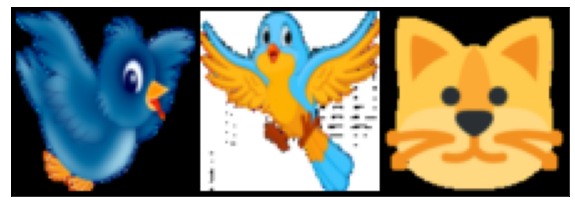

In [18]:
show_batch(train_dl)

# Reference

- [https://pytorch.org/docs/stable/data.html](https://pytorch.org/docs/stable/data.html)
- [Deep Learning with PyTorch: Zero to GANs](https://jovian.ai/learn/deep-learning-with-pytorch-zero-to-gans)